In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Paths
category = "Residential"
split = "test"
training_data_dir = f"../data/training_data"
output_masks_dir = f"../data/binary_masks/{category}/{split}"

# Number of test images to visualize
num_test_images = 10

# Load images
image_path = os.path.join(training_data_dir, f"{category}_{split}.npy")
images = np.load(image_path)

# List all mask batches
batch_files = sorted([os.path.join(output_masks_dir, f) for f in os.listdir(output_masks_dir) if f.startswith("mask_")])

# Batch size
batch_size = 20  # Adjust if different from your script

for i in range(num_test_images):
    # Original image
    original_image = images[i]

    # Debug original image values
    print(f"Image {i}: Min={original_image.min()}, Max={original_image.max()}, Dtype={original_image.dtype}")

    # Convert original image to uint8 for proper visualization
    if original_image.max() <= 1.0:  # Normalized range [0, 1]
        original_image = (original_image * 255).astype(np.uint8)
    elif original_image.dtype != np.uint8:  # Convert other ranges to uint8
        original_image = original_image.astype(np.uint8)

    # Determine which batch contains the mask
    batch_index = i // batch_size
    mask_index = i % batch_size

    # Load the corresponding mask batch
    if batch_index >= len(batch_files):
        print(f"No batch available for image {i}. Skipping.")
        continue

    mask_batch_path = batch_files[batch_index]
    mask_batch = np.load(mask_batch_path)

    # Extract the specific mask
    segmentation_mask = mask_batch[mask_index]

    # Select the most likely class for each pixel (single-channel)
    segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)

    # Resize segmentation mask to match the original image dimensions
    segmentation_mask_resized = cv2.resize(
        segmentation_mask_class.astype(np.uint8),
        (original_image.shape[1], original_image.shape[0]),
        interpolation=cv2.INTER_NEAREST,
    )

    # Normalize segmentation mask for overlay
    segmentation_mask_normalized = segmentation_mask_resized / segmentation_mask_resized.max()

    # Overlay segmentation mask on the original image
    overlay_image = original_image.copy()
    overlay_image[..., 0] = (
        overlay_image[..., 0] * 0.5 + segmentation_mask_normalized * 255 * 0.5
    )

    # Visualization
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(segmentation_mask_resized, cmap="jet")
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_image)
    plt.title("Overlay Image")
    plt.axis("off")

    plt.show()


Image 0: Min=0.19607843458652496, Max=1.0, Dtype=float32


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


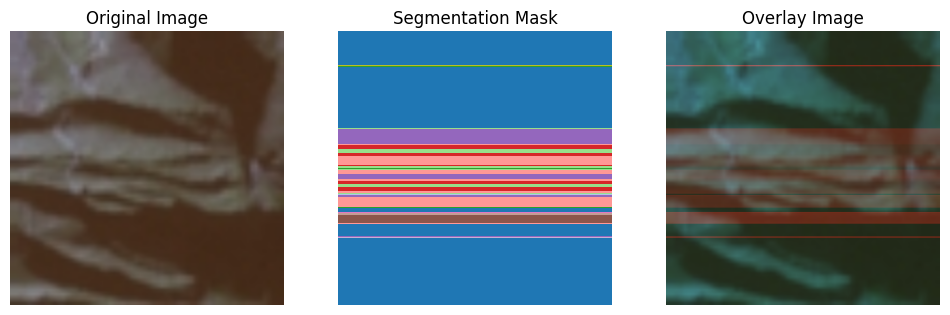

Mask not found for image 1. Skipping.
Mask not found for image 2. Skipping.
Mask not found for image 3. Skipping.
Mask not found for image 4. Skipping.


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is installed: pip install opencv-python


# preprocessed_outdir = "../data/preprocessed_output_data"
# output_masks_dir = f"../data/segmentation_masks/{category}/{split}"

# Paths
category = "HerbaceousVegetation"  # Change as needed
split = "train"          # Options: train, val, test
preprocessed_outdir = "../../data/training_data"
output_masks_dir = f"../../data/MASKS/binary_masks/{category}/{split}"

# Load images and masks
image_path = os.path.join(preprocessed_outdir, f"{category}_{split}.npy")
images = np.load(image_path)

# Configuration
alpha = 0.5  # Transparency for overlay
use_colormap = False  # Toggle between grayscale and color map overlay

for i in range(5):  # Visualize the first 5 images
    # Original image
    original_image = images[i]

    # Normalize the original image to uint8 for visualization
    if original_image.max() <= 1.0:  # Normalized range [0, 1]
        original_image = (original_image * 255).astype(np.uint8)
    elif original_image.dtype != np.uint8:  # Other ranges
        original_image = original_image.astype(np.uint8)

    # Load segmentation mask
    mask_path = os.path.join(output_masks_dir, f"mask_{i}.npy")
    if not os.path.exists(mask_path):
        print(f"Mask not found for image {i}. Skipping.")
        continue
    segmentation_mask = np.load(mask_path)

    # Convert multi-class segmentation mask to single-channel
    segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)

    # Resize segmentation mask to match the original image dimensions
    segmentation_mask_resized = cv2.resize(
        segmentation_mask_class.astype(np.uint8),
        (original_image.shape[1], original_image.shape[0]),
        interpolation=cv2.INTER_NEAREST,
    )

    # Create overlay
    if use_colormap:
        # Overlay using a color map
        overlay_image = cv2.addWeighted(
            original_image, alpha,
            cv2.applyColorMap((segmentation_mask_resized * (255 / segmentation_mask_resized.max())).astype(np.uint8), cv2.COLORMAP_JET),
            1 - alpha,
            0
        )
    else:
        # Overlay using grayscale normalization
        segmentation_mask_normalized = segmentation_mask_resized / segmentation_mask_resized.max()
        overlay_image = original_image.copy()
        overlay_image[..., 0] = (
            overlay_image[..., 0] * (1 - alpha) + segmentation_mask_normalized * 255 * alpha
        )

    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(segmentation_mask_resized, cmap="tab20")
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_image)
    plt.title("Overlay Image")
    plt.axis("off")
    plt.show()


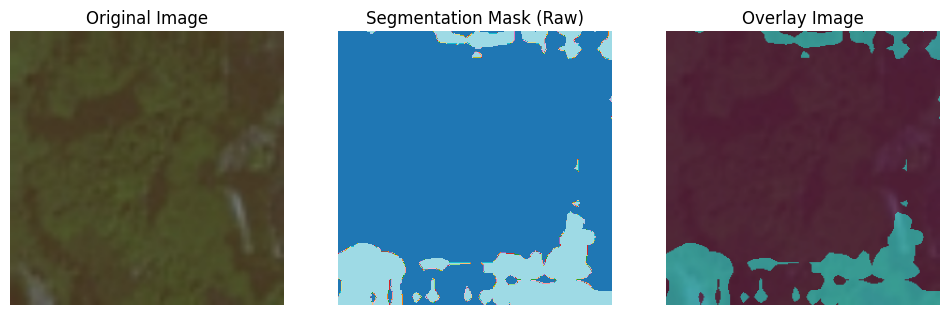

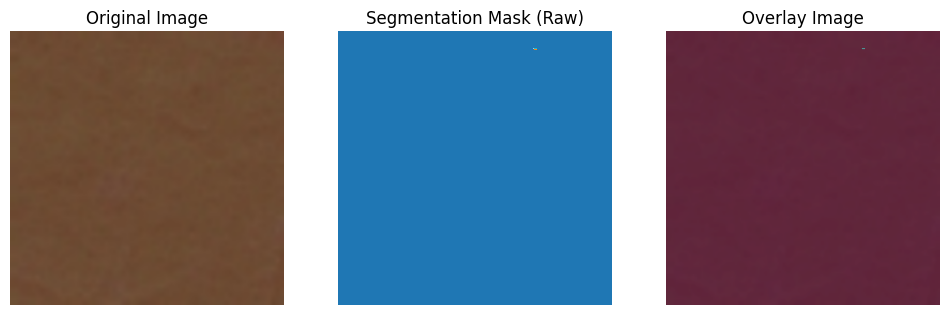

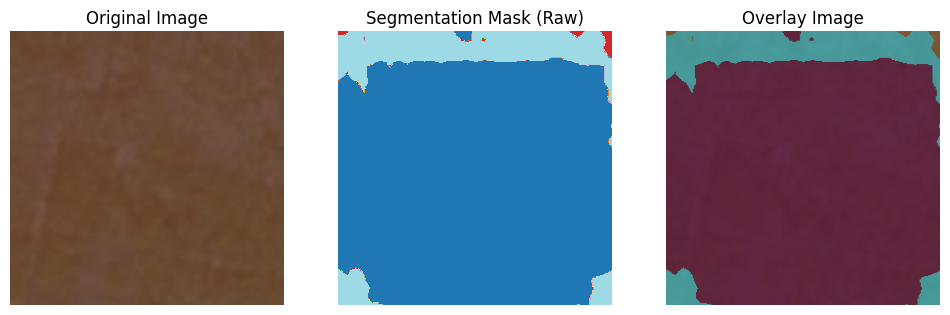

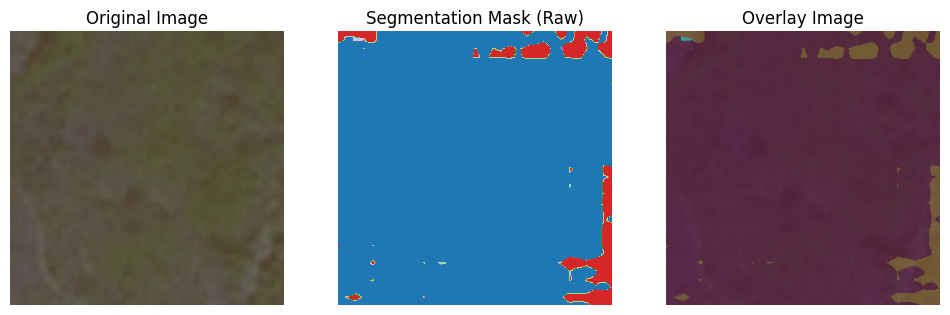

/tmp/ipykernel_857/550541562.py:46: RuntimeWarning: invalid value encountered in divide
  segmentation_mask_resized_normalized = (segmentation_mask_resized / segmentation_mask_resized.max()) * 255
/tmp/ipykernel_857/550541562.py:47: RuntimeWarning: invalid value encountered in cast
  segmentation_mask_resized_normalized = segmentation_mask_resized_normalized.astype(np.uint8)


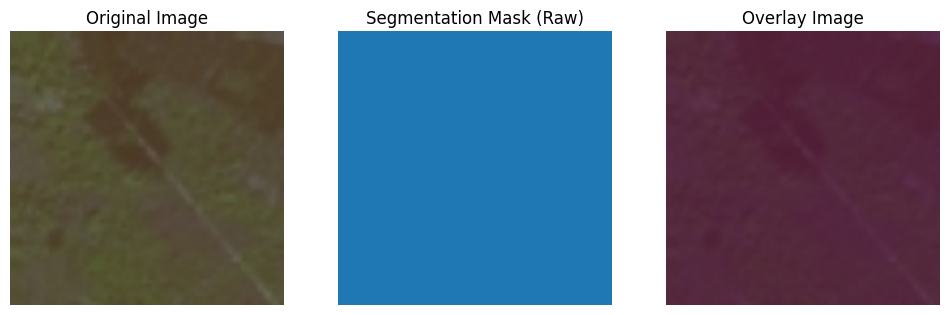

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is installed: pip install opencv-python

# Paths
category = "Forest"  # Change as needed
split = "train"          # Options: train, val, test
preprocessed_outdir = "../../data/training_data"
output_masks_dir = f"../../data/MASKS/segmentation_masks/{category}/{split}"

# Load images and masks
image_path = os.path.join(preprocessed_outdir, f"{category}_{split}.npy")
images = np.load(image_path)

# Configuration
alpha = 0.5  # Transparency for overlay
color_map = cv2.COLORMAP_VIRIDIS  # Smoother color map

for i in range(5):  # Visualize the first 5 images
    # Original image
    original_image = images[i]

    # Normalize the original image to uint8 for visualization
    if original_image.max() <= 1.0:
        original_image = (original_image * 255).astype(np.uint8)
    elif original_image.dtype != np.uint8:
        original_image = original_image.astype(np.uint8)

    # Load segmentation mask
    mask_path = os.path.join(output_masks_dir, f"mask_{i}.npy")
    if not os.path.exists(mask_path):
        print(f"Mask not found for image {i}. Skipping.")
        continue
    segmentation_mask = np.load(mask_path)

    # Convert multi-class segmentation mask to single-channel
    segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)

    # Resize and normalize the segmentation mask
    segmentation_mask_resized = cv2.resize(
        segmentation_mask_class.astype(np.uint8),
        (original_image.shape[1], original_image.shape[0]),
        interpolation=cv2.INTER_NEAREST,
    )
    segmentation_mask_resized_normalized = (segmentation_mask_resized / segmentation_mask_resized.max()) * 255
    segmentation_mask_resized_normalized = segmentation_mask_resized_normalized.astype(np.uint8)

    # Apply color map
    color_mapped_mask = cv2.applyColorMap(segmentation_mask_resized_normalized, color_map)

    # Create overlay
    overlay_image = cv2.addWeighted(original_image, alpha, color_mapped_mask, 1 - alpha, 0)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(segmentation_mask_resized, cmap="tab20")
    plt.title("Segmentation Mask (Raw)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_image)
    plt.title("Overlay Image")
    plt.axis("off")
    plt.show()


In [33]:
# 1. Entropy (Measure of Class Diversity)

import os
import numpy as np
from scipy.stats import entropy

# Paths
output_masks_dir = "../data/segmentation_masks"

# Function to calculate entropy for a single mask
def calculate_entropy(segmentation_mask_class):
    unique, counts = np.unique(segmentation_mask_class, return_counts=True)
    class_probabilities = counts / np.sum(counts)
    return entropy(class_probabilities)

# Function to process all categories and splits
def calculate_entropy_for_all_masks(output_masks_dir):
    results = {}

    for category in os.listdir(output_masks_dir):  # Iterate over categories
        category_path = os.path.join(output_masks_dir, category)
        if not os.path.isdir(category_path):
            continue
        
        category_results = {}
        for split in ["train", "val", "test"]:  # Iterate over splits
            split_path = os.path.join(category_path, split)
            if not os.path.exists(split_path):
                continue

            entropies = []
            for mask_file in os.listdir(split_path):  # Iterate over masks
                mask_path = os.path.join(split_path, mask_file)
                segmentation_mask = np.load(mask_path)
                segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)
                mask_entropy = calculate_entropy(segmentation_mask_class)
                entropies.append(mask_entropy)

            if entropies:
                category_results[split] = {
                    "average_entropy": np.mean(entropies),
                    "num_masks": len(entropies),
                }

        results[category] = category_results

    return results

# Main execution
results = calculate_entropy_for_all_masks(output_masks_dir)

# Print results
for category, splits in results.items():
    print(f"Category: {category}")
    for split, stats in splits.items():
        print(f"  Split: {split}")
        print(f"    Average Entropy: {stats['average_entropy']:.4f}")
        print(f"    Number of Masks: {stats['num_masks']}")


Category: Highway
  Split: train
    Average Entropy: 0.4119
    Number of Masks: 1600
  Split: val
    Average Entropy: 0.3682
    Number of Masks: 400
  Split: test
    Average Entropy: 0.3840
    Number of Masks: 500
Category: HerbaceousVegetation
  Split: train
    Average Entropy: 0.3745
    Number of Masks: 1920
  Split: val
    Average Entropy: 0.3861
    Number of Masks: 480
  Split: test
    Average Entropy: 0.3504
    Number of Masks: 600
Category: Residential
  Split: train
    Average Entropy: 0.3852
    Number of Masks: 1920
  Split: val
    Average Entropy: 0.4043
    Number of Masks: 480
  Split: test
    Average Entropy: 0.4120
    Number of Masks: 600
Category: Forest
  Split: train
    Average Entropy: 0.1454
    Number of Masks: 1920
  Split: val
    Average Entropy: 0.1458
    Number of Masks: 480
  Split: test
    Average Entropy: 0.1552
    Number of Masks: 600
Category: Industrial
  Split: train
    Average Entropy: 0.5808
    Number of Masks: 1600
  Split: val
 

In [34]:
# Pixel Distribution Across All Categories and Splits
# Displays the percentage of pixels for each class in a structured format.

import os
import numpy as np

# Paths
output_masks_dir = "../data/segmentation_masks"

# Function to calculate pixel distribution for a single mask directory
def calculate_pixel_distribution(mask_dir):
    category_results = {}
    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        segmentation_mask = np.load(mask_path)
        segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)

        # Count pixels for each class
        unique, counts = np.unique(segmentation_mask_class, return_counts=True)
        class_distribution = dict(zip(unique, counts))

        # Aggregate results
        for cls, count in class_distribution.items():
            if cls not in category_results:
                category_results[cls] = 0
            category_results[cls] += count

    # Normalize results to percentage
    total_pixels = sum(category_results.values())
    class_percentages = {cls: (count / total_pixels) * 100 for cls, count in category_results.items()}

    return class_percentages

# Function to process all categories and splits
def analyze_pixel_distribution(output_masks_dir):
    results = {}

    for category in os.listdir(output_masks_dir):  # Iterate over categories
        category_path = os.path.join(output_masks_dir, category)
        if not os.path.isdir(category_path):
            continue

        category_results = {}
        for split in ["train", "val", "test"]:  # Iterate over splits
            split_path = os.path.join(category_path, split)
            if not os.path.exists(split_path):
                continue

            # Calculate pixel distribution for this split
            pixel_distribution = calculate_pixel_distribution(split_path)
            category_results[split] = pixel_distribution

        results[category] = category_results

    return results

# Main execution
pixel_distribution_results = analyze_pixel_distribution(output_masks_dir)

# Print results
for category, splits in pixel_distribution_results.items():
    print(f"Category: {category}")
    for split, distribution in splits.items():
        print(f"  Split: {split}")
        for cls, pct in distribution.items():
            print(f"    Class {cls}: {pct:.2f}%")


Category: Highway
  Split: train
    Class 0: 65.82%
    Class 4: 8.62%
    Class 5: 0.53%
    Class 11: 1.65%
    Class 20: 0.22%
    Class 6: 4.00%
    Class 14: 4.47%
    Class 7: 0.59%
    Class 9: 0.23%
    Class 10: 3.09%
    Class 13: 1.44%
    Class 17: 4.90%
    Class 1: 3.66%
    Class 19: 0.53%
    Class 2: 0.06%
    Class 8: 0.04%
    Class 3: 0.00%
    Class 18: 0.06%
    Class 15: 0.06%
    Class 16: 0.03%
    Class 12: 0.00%
  Split: val
    Class 0: 70.54%
    Class 4: 6.70%
    Class 1: 2.13%
    Class 7: 0.67%
    Class 10: 3.28%
    Class 13: 0.86%
    Class 5: 0.43%
    Class 6: 3.20%
    Class 8: 0.04%
    Class 18: 0.02%
    Class 14: 5.65%
    Class 20: 0.42%
    Class 3: 0.01%
    Class 15: 0.03%
    Class 19: 0.47%
    Class 17: 3.55%
    Class 11: 1.79%
    Class 9: 0.20%
    Class 2: 0.01%
    Class 12: 0.00%
  Split: test
    Class 1: 1.98%
    Class 6: 5.90%
    Class 11: 1.84%
    Class 0: 66.64%
    Class 5: 0.34%
    Class 4: 7.95%
    Class 14: 5.04%
  

In [35]:
## 3. Compactness (Spatial Consistency)
##
##    What it measures: Checks if the predicted classes form compact regions rather than scattered or noisy predictions.
##    Why it's useful: Compact masks are often indicative of good segmentation.


import os
import numpy as np
from skimage.measure import label, regionprops

# Function to calculate compactness for a single segmentation mask
def calculate_compactness(segmentation_mask):
    compactness_results = {}
    
    # Iterate over unique classes in the mask
    unique_classes = np.unique(segmentation_mask)
    for cls in unique_classes:
        if cls == 0:  # Ignore background class (if applicable)
            continue
        
        # Binary mask for the current class
        binary_mask = (segmentation_mask == cls).astype(np.uint8)
        
        # Label connected components
        labeled_mask = label(binary_mask, connectivity=2)
        regions = regionprops(labeled_mask)
        
        # Calculate compactness for each connected region
        compactness_scores = [
            (4 * np.pi * region.area) / (region.perimeter ** 2 + 1e-5)
            for region in regions if region.perimeter > 0
        ]
        
        # Average compactness for this class
        if compactness_scores:
            compactness_results[cls] = np.mean(compactness_scores)
        else:
            compactness_results[cls] = 0  # No valid regions

    return compactness_results

# Function to process all categories and splits
def analyze_compactness(output_masks_dir):
    compactness_results = {}

    for category in os.listdir(output_masks_dir):  # Iterate over categories
        category_path = os.path.join(output_masks_dir, category)
        if not os.path.isdir(category_path):
            continue

        category_compactness = {}
        for split in ["train", "val", "test"]:  # Iterate over splits
            split_path = os.path.join(category_path, split)
            if not os.path.exists(split_path):
                continue

            # Aggregate compactness scores for this split
            split_compactness = []
            for mask_file in os.listdir(split_path):
                mask_path = os.path.join(split_path, mask_file)
                segmentation_mask = np.load(mask_path)
                segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)
                
                compactness = calculate_compactness(segmentation_mask_class)
                split_compactness.append(compactness)

            # Average compactness for each class
            class_compactness_avg = {}
            for compactness in split_compactness:
                for cls, score in compactness.items():
                    if cls not in class_compactness_avg:
                        class_compactness_avg[cls] = []
                    class_compactness_avg[cls].append(score)
            for cls, scores in class_compactness_avg.items():
                class_compactness_avg[cls] = np.mean(scores)

            category_compactness[split] = class_compactness_avg

        compactness_results[category] = category_compactness

    return compactness_results

# Paths
output_masks_dir = "../data/segmentation_masks"

# Main execution
compactness_results = analyze_compactness(output_masks_dir)

# Print results
for category, splits in compactness_results.items():
    print(f"Category: {category}")
    for split, compactness in splits.items():
        print(f"  Split: {split}")
        for cls, score in compactness.items():
            print(f"    Class {cls}: Compactness: {score:.4f}")


Category: Highway
  Split: train
    Class 4: Compactness: 2.3104
    Class 5: Compactness: 3.0744
    Class 11: Compactness: 2.9752
    Class 20: Compactness: 3.2266
    Class 6: Compactness: 2.6356
    Class 14: Compactness: 2.8250
    Class 7: Compactness: 2.4363
    Class 9: Compactness: 3.0165
    Class 10: Compactness: 2.8694
    Class 13: Compactness: 3.0114
    Class 17: Compactness: 2.6763
    Class 1: Compactness: 2.7502
    Class 19: Compactness: 2.4405
    Class 2: Compactness: 3.6063
    Class 8: Compactness: 3.1947
    Class 3: Compactness: 2.8252
    Class 18: Compactness: 5.8882
    Class 15: Compactness: 2.8860
    Class 16: Compactness: 2.5802
    Class 12: Compactness: 1.0025
  Split: val
    Class 4: Compactness: 2.5830
    Class 1: Compactness: 2.2631
    Class 7: Compactness: 2.0216
    Class 10: Compactness: 2.9363
    Class 13: Compactness: 3.1616
    Class 5: Compactness: 3.1114
    Class 6: Compactness: 2.2943
    Class 8: Compactness: 2.6991
    Class 18: Com

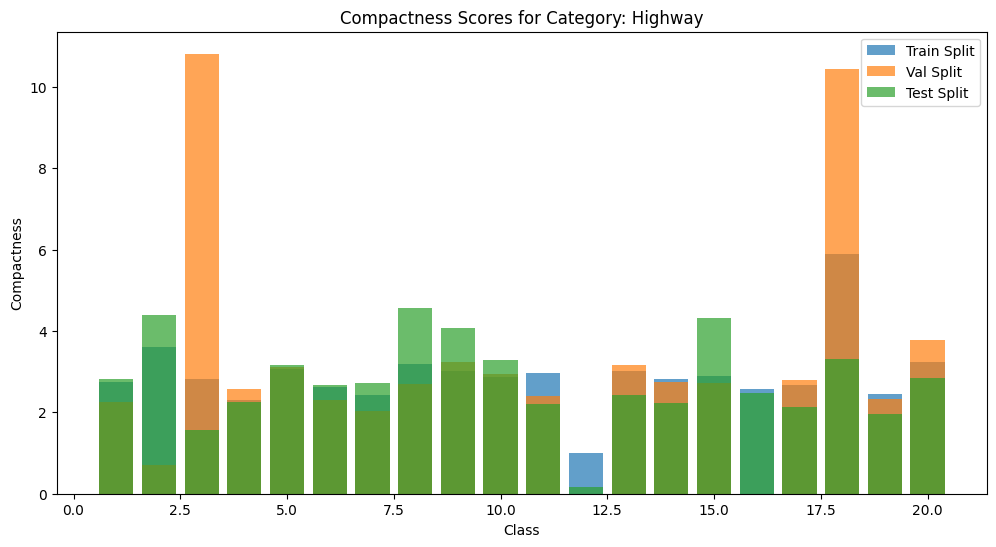

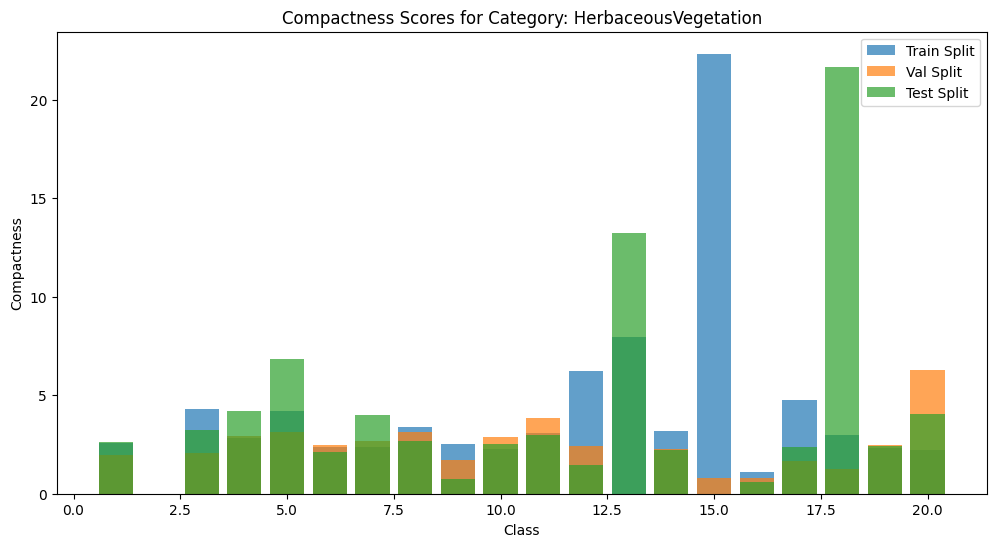

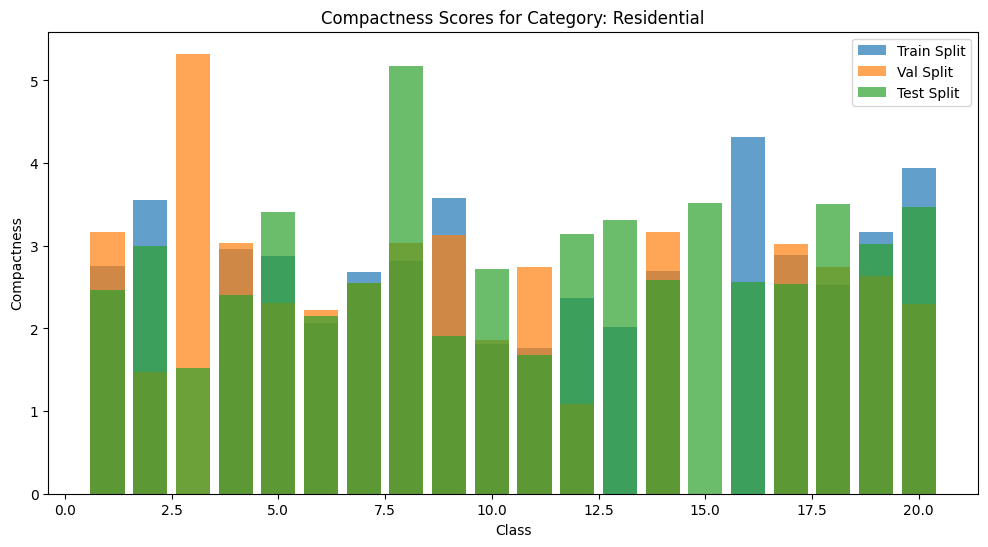

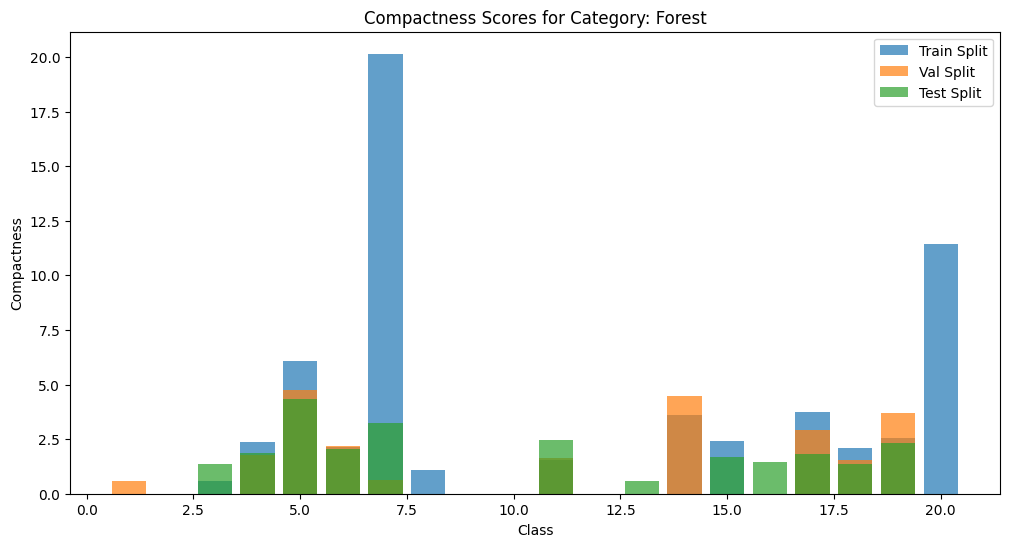

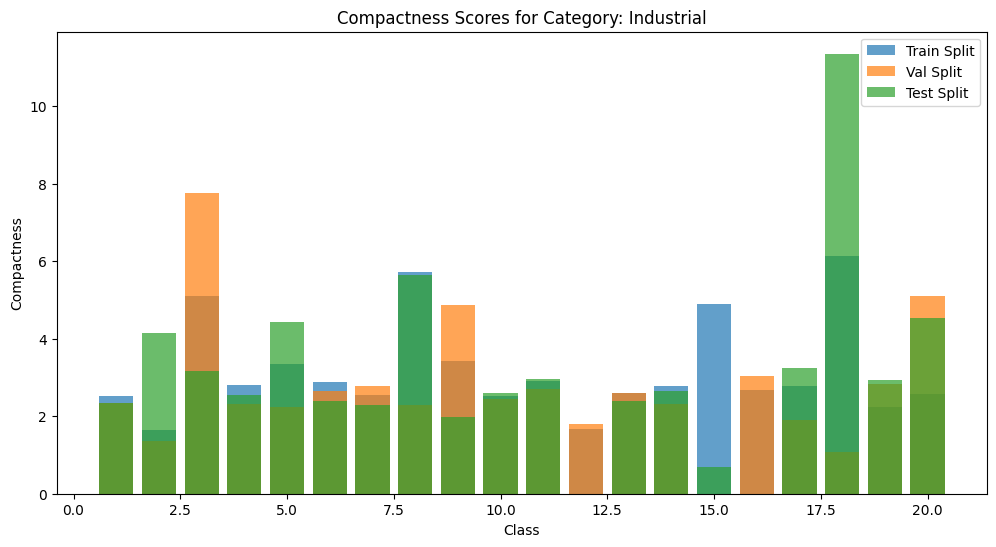

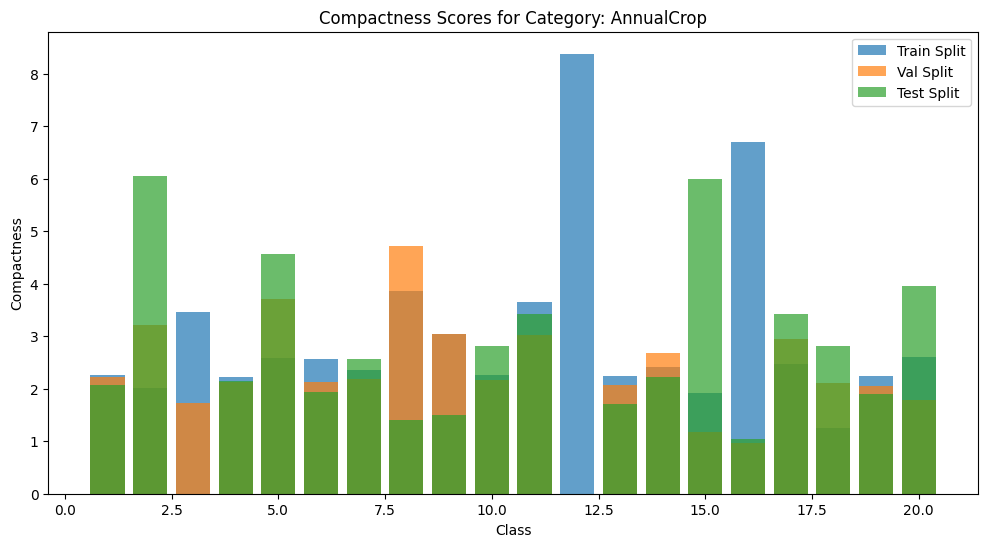

In [36]:
import matplotlib.pyplot as plt

def plot_compactness(compactness_results):
    for category, splits in compactness_results.items():
        plt.figure(figsize=(12, 6))
        for split, compactness in splits.items():
            classes = list(compactness.keys())
            scores = list(compactness.values())
            
            plt.bar(classes, scores, alpha=0.7, label=f"{split.capitalize()} Split")
        
        plt.title(f"Compactness Scores for Category: {category}")
        plt.xlabel("Class")
        plt.ylabel("Compactness")
        plt.legend()
        plt.show()

# Call the plotting function
plot_compactness(compactness_results)


In [37]:
"""
4. Region Count

    What it measures: Counts the number of contiguous regions for each class.
    Why it's useful: A high number of scattered regions could indicate noisy segmentation.
"""

import os
import numpy as np
import cv2
from skimage.measure import label
import logging

# Paths
categories = ["Forest", "Residential", "Highway", "AnnualCrop", "HerbaceousVegetation", "Industrial"]
splits = ["train", "val", "test"]
output_masks_dir = "../data/segmentation_masks"

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Function to calculate region counts
def calculate_region_counts(segmentation_mask):
    region_counts = {}
    unique_classes = np.unique(segmentation_mask)

    for cls in unique_classes:
        if cls == 0:
            continue  # Skip background class

        # Create a binary mask for the current class
        binary_mask = (segmentation_mask == cls).astype(np.uint8)

        # Count contiguous regions using connected component labeling
        labeled_mask = label(binary_mask, connectivity=2)
        region_counts[cls] = np.max(labeled_mask)  # Number of regions

    return region_counts

# Main function
results = {}
def analyze_region_counts():
    for category in categories:
        results[category] = {}
        for split in splits:
            logging.info(f"Analyzing region counts for {category} - {split}")
            split_dir = os.path.join(output_masks_dir, category, split)
            if not os.path.exists(split_dir):
                logging.warning(f"Directory not found: {split_dir}. Skipping.")
                continue

            region_count_summary = {}
            mask_files = [f for f in os.listdir(split_dir) if f.endswith(".npy")]

            for mask_file in mask_files:
                mask_path = os.path.join(split_dir, mask_file)
                segmentation_mask = np.load(mask_path)
                segmentation_mask_class = np.argmax(segmentation_mask, axis=-1)

                # Calculate region counts
                region_counts = calculate_region_counts(segmentation_mask_class)

                # Aggregate results
                for cls, count in region_counts.items():
                    if cls not in region_count_summary:
                        region_count_summary[cls] = []
                    region_count_summary[cls].append(count)

            # Calculate average region count per class
            results[category][split] = {
                cls: np.mean(counts) for cls, counts in region_count_summary.items()
            }

            logging.info(f"Completed {category} - {split}")

    # Display results
    for category, splits_data in results.items():
        print(f"Category: {category}")
        for split, class_data in splits_data.items():
            print(f"  Split: {split}")
            for cls, avg_count in class_data.items():
                print(f"    Class {cls}: Average Region Count: {avg_count:.2f}")

if __name__ == "__main__":
    analyze_region_counts()


2024-12-24 00:06:05,830 - INFO - Analyzing region counts for Forest - train
2024-12-24 00:06:12,186 - INFO - Completed Forest - train
2024-12-24 00:06:12,187 - INFO - Analyzing region counts for Forest - val
2024-12-24 00:06:13,954 - INFO - Completed Forest - val
2024-12-24 00:06:13,955 - INFO - Analyzing region counts for Forest - test
2024-12-24 00:06:16,672 - INFO - Completed Forest - test
2024-12-24 00:06:16,673 - INFO - Analyzing region counts for Residential - train
2024-12-24 00:06:24,765 - INFO - Completed Residential - train
2024-12-24 00:06:24,766 - INFO - Analyzing region counts for Residential - val
2024-12-24 00:06:27,280 - INFO - Completed Residential - val
2024-12-24 00:06:27,281 - INFO - Analyzing region counts for Residential - test
2024-12-24 00:06:29,463 - INFO - Completed Residential - test
2024-12-24 00:06:29,463 - INFO - Analyzing region counts for Highway - train
2024-12-24 00:06:35,708 - INFO - Completed Highway - train
2024-12-24 00:06:35,709 - INFO - Analyzing

Category: Forest
  Split: train
    Class 6: Average Region Count: 10.04
    Class 19: Average Region Count: 8.36
    Class 17: Average Region Count: 4.70
    Class 4: Average Region Count: 6.72
    Class 5: Average Region Count: 3.00
    Class 18: Average Region Count: 15.67
    Class 15: Average Region Count: 2.00
    Class 14: Average Region Count: 2.00
    Class 11: Average Region Count: 6.73
    Class 16: Average Region Count: 1.00
    Class 7: Average Region Count: 2.00
    Class 3: Average Region Count: 3.00
    Class 8: Average Region Count: 4.00
    Class 20: Average Region Count: 6.00
  Split: val
    Class 6: Average Region Count: 10.65
    Class 19: Average Region Count: 9.12
    Class 4: Average Region Count: 6.57
    Class 5: Average Region Count: 1.50
    Class 17: Average Region Count: 7.50
    Class 18: Average Region Count: 13.50
    Class 11: Average Region Count: 7.25
    Class 1: Average Region Count: 4.00
    Class 7: Average Region Count: 4.50
    Class 14: Avera